In [ ]:
%pip install python-binance pandas numpy statsmodels

from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd
import numpy as np
import os

client = bnb_client(tld='US')

In [4]:
def get_binance_px(symbol, freq='1d', start_ts='2020-01-01', end_ts='2024-12-31'):
    data = client.get_historical_klines(symbol, freq, start_ts, end_ts)
    columns = [
        'open_time','open','high','low','close','volume','close_time',
        'quote_volume','num_trades','taker_base_volume','taker_quote_volume','ignore'
    ]
    df = pd.DataFrame(data, columns=columns)

    # Convert to UTC
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms', utc=True)
    df.set_index('open_time', inplace=True)

    df = df[['open','high','low','close','volume']]
    for col in ['open','high','low','close','volume']:
        df[col] = df[col].astype(float)

    return df

In [5]:
univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT']

freq = '1d'
os.makedirs('../data/raw', exist_ok=True)

for ticker in univ:
    df = get_binance_px(ticker, freq)
    coin = ticker.replace('USDT','')
    df.to_csv(f'../data/raw/{coin}_USDT.csv')
    print(f'Saved {coin}')

Saved BTC
Saved ETH
Saved ADA
Saved BNB
Saved XRP


In [6]:
all_coins = {}
for ticker in univ:
    coin = ticker.replace('USDT','')
    df = pd.read_csv(f'../data/raw/{coin}_USDT.csv', index_col='open_time', parse_dates=True)
    all_coins[coin] = df

print(all_coins.keys())
all_coins['BTC'].head()

dict_keys(['BTC', 'ETH', 'ADA', 'BNB', 'XRP'])


,open,high,low,close,volume
open_time,,,,,
2020-01-01 00:00:00+00:00,7180.46,7245.54,7175.62,7195.65,31.403883
2020-01-02 00:00:00+00:00,7191.39,7210.05,6934.29,6961.80,67.004407
2020-01-03 00:00:00+00:00,6958.14,7404.24,6877.78,7345.65,102.621386
2020-01-04 00:00:00+00:00,7344.55,7403.98,7282.25,7349.45,32.271372
2020-01-05 00:00:00+00:00,7363.88,7489.84,7332.96,7364.19,67.247638


In [7]:
date_range = pd.date_range(
    start='2020-01-01', 
    end='2024-12-31', 
    freq='D', 
    tz='UTC'
)

for coin, df in all_coins.items():
    all_coins[coin] = df.reindex(date_range).ffill()
    print(f"{coin}: {all_coins[coin].index.min()} to {all_coins[coin].index.max()}")

BTC: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
ETH: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
ADA: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
BNB: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
XRP: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00


In [8]:
all_coins.keys()

dict_keys(['BTC', 'ETH', 'ADA', 'BNB', 'XRP'])

CROSS SECTIONAL RANKING

In [9]:
lookback_days = 30  

momentum_df = pd.DataFrame(index=all_coins['BTC'].index)

for coin, df in all_coins.items():
    coin_symbol = coin.replace('USDT','')  # if your keys still have USDT
    momentum_df[coin_symbol] = df['close'].pct_change(lookback_days)

momentum_df.head(35)


,BTC,ETH,ADA,BNB,XRP
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN


In [20]:
ranks = momentum_df.rank(axis=1, ascending=False, method='min')
ranks.head(40)

,BTC,ETH,ADA,BNB,XRP
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN


In [21]:
num_coins = len(momentum_df.columns)
top_pct = 0.4  

top_cutoff = int(num_coins * top_pct)
if top_cutoff == 0:
    top_cutoff = 1  # Always at least one coin

long_positions = ranks <= top_cutoff

# Check
print(ranks.loc['2020-02-01'])
print(long_positions.loc['2020-02-01'])


BTC    4.0
ETH    2.0
ADA    1.0
BNB    3.0
XRP    5.0
Name: 2020-02-01 00:00:00+00:00, dtype: float64
BTC    False
ETH     True
ADA     True
BNB    False
XRP    False
Name: 2020-02-01 00:00:00+00:00, dtype: bool


In [22]:
daily_rets = pd.DataFrame(index=momentum_df.index)

for coin, df in all_coins.items():
    coin_symbol = coin.replace('USDT','')
    daily_rets[coin_symbol] = df['close'].pct_change()

daily_rets.head(40)


,BTC,ETH,ADA,BNB,XRP
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,-0.032499,-0.025283,-0.022116,-0.049133,-0.027926
2020-01-03 00:00:00+00:00,0.055137,0.052900,0.040037,0.046120,0.029741
2020-01-04 00:00:00+00:00,0.000517,0.000523,0.011167,0.012574,-0.002226
2020-01-05 00:00:00+00:00,0.002006,0.009029,0.004069,0.017572,0.009597
2020-01-06 00:00:00+00:00,0.056128,0.064705,0.077569,0.063839,0.143973
2020-01-07 00:00:00+00:00,0.051020,-0.007570,-0.005103,0.005712,-0.039660
2020-01-08 00:00:00+00:00,-0.014970,-0.013997,-0.017009,-0.029884,-0.027875
2020-01-09 00:00:00+00:00,-0.028273,-0.019945,-0.007141,-0.010495,-0.018042
2020-01-10 00:00:00+00:00,0.047375,0.045191,0.020194,0.043402,0.036453


In [23]:
daily_rets.loc['2020-02-02']

BTC   -0.005962
ETH    0.026667
ADA   -0.009785
BNB    0.010785
XRP    0.040415
Name: 2020-02-02 00:00:00+00:00, dtype: float64

/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35459/2154156374.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  portfolio_cum = (1 + portfolio_ret.fillna(0)).cumprod()


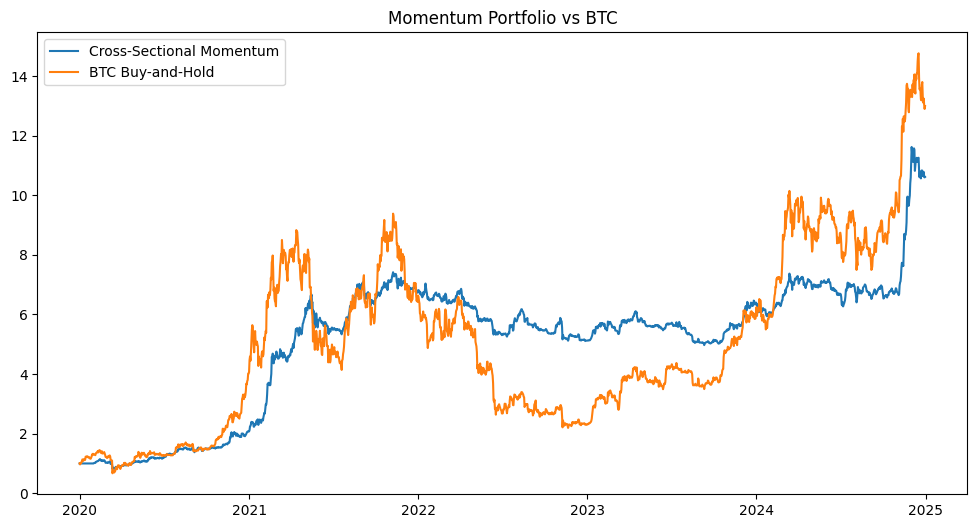

In [24]:
portfolio_ret = (daily_rets * long_positions.shift(1)).mean(axis=1)

# BTC Beta
btc_ret = daily_rets['BTC']

# Cumulative returns
portfolio_cum = (1 + portfolio_ret.fillna(0)).cumprod()
btc_cum = (1 + btc_ret.fillna(0)).cumprod()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(portfolio_cum, label='Cross-Sectional Momentum')
plt.plot(btc_cum, label='BTC Buy-and-Hold')
plt.legend()
plt.title('Momentum Portfolio vs BTC')
plt.show()

Bin_1    0.382625
Bin_2    0.343398
Bin_3    0.338012
Bin_4    0.133854
Bin_5    0.072875
dtype: object


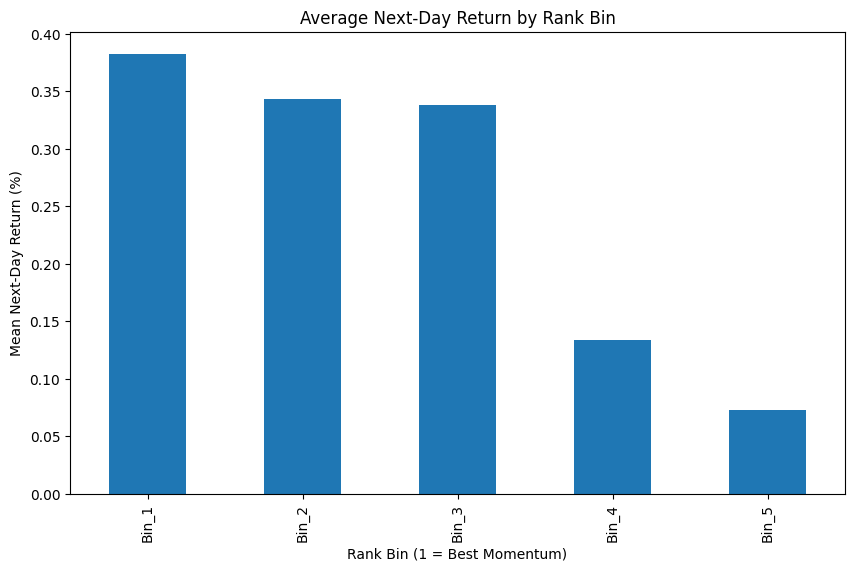

In [25]:
rank_bins = ranks.copy()

num_bins = 5
rank_bins = pd.qcut(ranks.stack(), q=num_bins, labels=False) + 1
rank_bins = rank_bins.unstack()

daily_rets_shifted = daily_rets.shift(-1)  

bin_returns = []
for b in range(1, num_bins+1):
    mask = rank_bins == b
    mean_ret = (daily_rets_shifted * mask).sum(axis=1) / mask.sum(axis=1)
    bin_returns.append(mean_ret)

bin_returns_df = pd.concat(bin_returns, axis=1)
bin_returns_df.columns = [f'Bin_{b}' for b in range(1, num_bins+1)]

avg_bin_rets = bin_returns_df.mean() * 100  # in %
print(avg_bin_rets)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
avg_bin_rets.plot(kind='bar')
plt.title('Average Next-Day Return by Rank Bin')
plt.xlabel('Rank Bin (1 = Best Momentum)')
plt.ylabel('Mean Next-Day Return (%)')
plt.show()


<Axes: title={'center': 'Trailing Return Spread (Top 1 vs Bottom 1)'}>

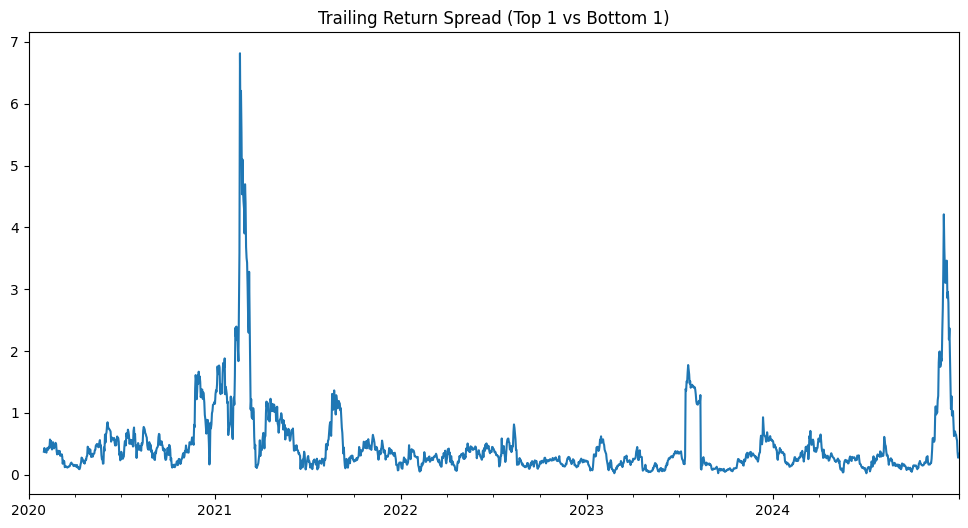

In [26]:
top_returns = momentum_df.apply(lambda x: x.nlargest(1).mean(), axis=1)
bottom_returns = momentum_df.apply(lambda x: x.nsmallest(1).mean(), axis=1)

spread = top_returns - bottom_returns

spread.plot(figsize=(12,6), title='Trailing Return Spread (Top 1 vs Bottom 1)')


<Axes: title={'center': '30-Day Rolling Sharpe Ratio (Momentum Factor)'}>

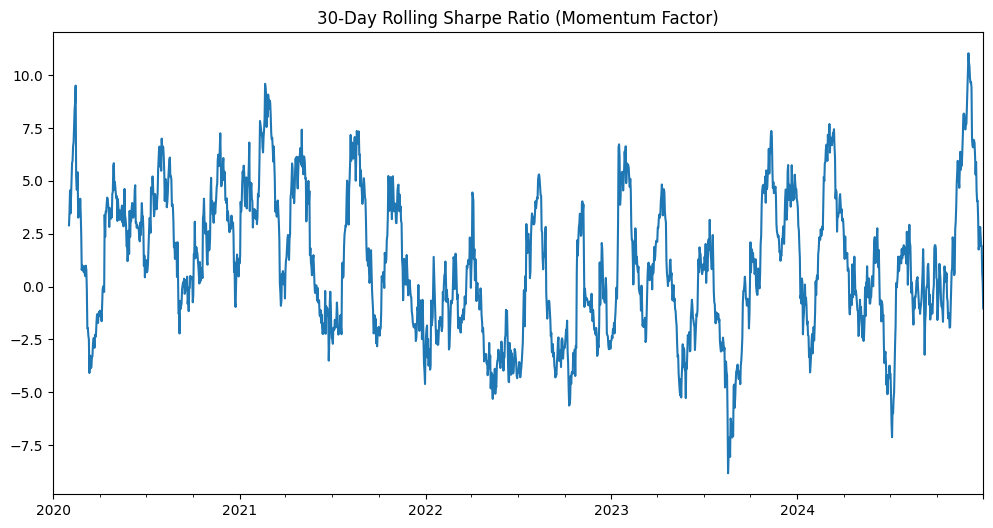

In [30]:
roll_window = 30

roll_sharpe = (
    portfolio_ret.rolling(roll_window).mean() /
    portfolio_ret.rolling(roll_window).std()
) * np.sqrt(252)

roll_sharpe.plot(figsize=(12,6), title=f'{roll_window}-Day Rolling Sharpe Ratio (Momentum Factor)')


PAIRS

In [31]:
import numpy as np

btc_log = np.log(all_coins['BTC']['close'])
eth_log = np.log(all_coins['ETH']['close'])

btc_log.head(), eth_log.head()

(2020-01-01 00:00:00+00:00    8.881232
 2020-01-02 00:00:00+00:00    8.848193
 2020-01-03 00:00:00+00:00    8.901864
 2020-01-04 00:00:00+00:00    8.902381
 2020-01-05 00:00:00+00:00    8.904384
 Freq: D, Name: close, dtype: float64,
 2020-01-01 00:00:00+00:00    4.871526
 2020-01-02 00:00:00+00:00    4.845918
 2020-01-03 00:00:00+00:00    4.897467
 2020-01-04 00:00:00+00:00    4.897989
 2020-01-05 00:00:00+00:00    4.906977
 Freq: D, Name: close, dtype: float64)

ETH=α+β⋅BTC+ϵ (BETA)

In [33]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import statsmodels.api as sm

X = btc_log.values.reshape(-1, 1)
X = sm.add_constant(X)  # adds intercept
model = sm.OLS(eth_log, X).fit()

hedge_ratio = model.params[1]
print("Hedge ratio ETH/BTC:", hedge_ratio)

Hedge ratio ETH/BTC: 1.2667172046700357


/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35459/3774550414.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]


In [35]:
from statsmodels.tsa.stattools import adfuller

# Spread = ETH - beta * BTC
spread = eth_log - hedge_ratio * btc_log

result = adfuller(spread.dropna())
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')

ADF Statistic: -1.8060
p-value: 0.3775


<Axes: title={'center': 'ETH/BTC Spread Z-Score'}>

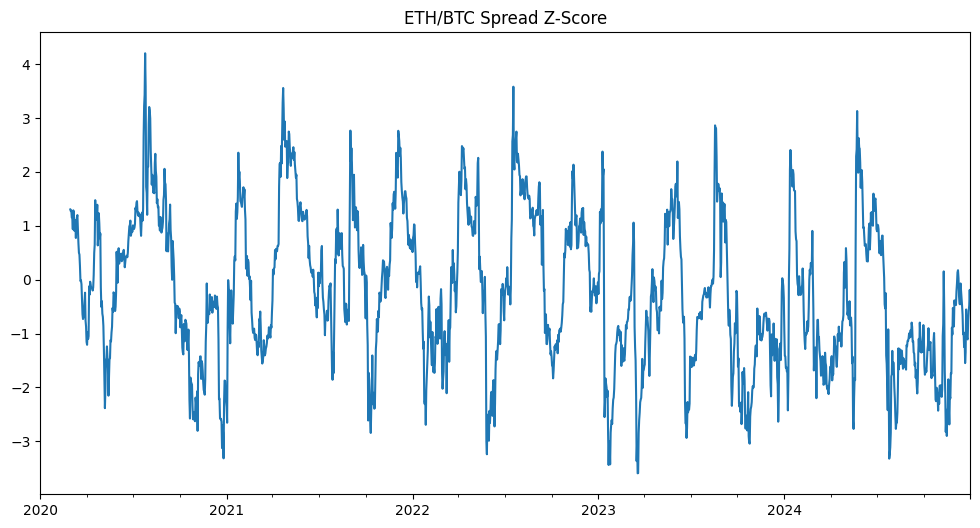

In [36]:
lookback = 60  # days for rolling stats

spread_mean = spread.rolling(lookback).mean()
spread_std = spread.rolling(lookback).std()

z_score = (spread - spread_mean) / spread_std

z_score.plot(figsize=(12,6), title='ETH/BTC Spread Z-Score')

In [39]:
# Simple rule: Long spread when z < -1, short when z > +1
long_spread = z_score < -1
short_spread = z_score > 1

# Signal: +1 for long, -1 for short, 0 otherwise
pairs_signal = np.where(long_spread, 1, np.where(short_spread, -1, 0))

import pandas as pd
signals_df = pd.Series(pairs_signal, index=z_score.index)


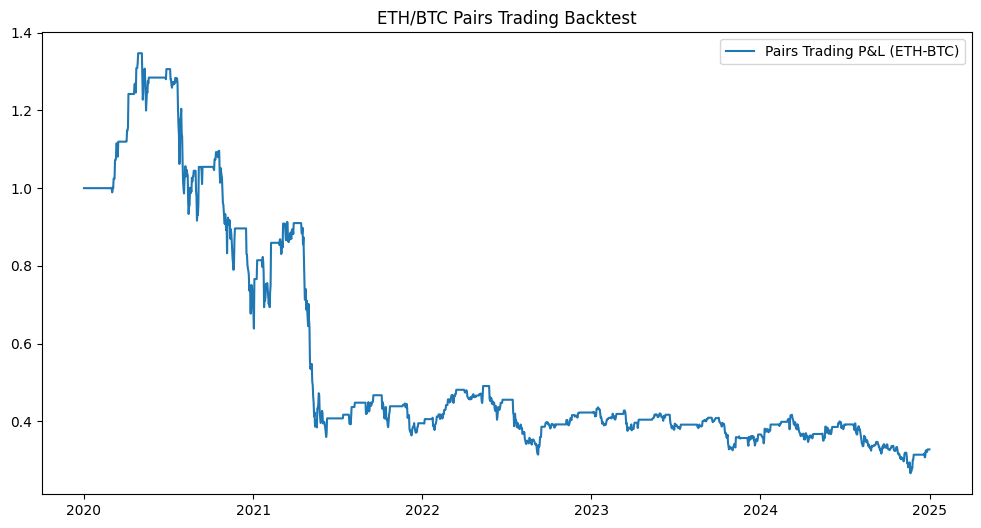

In [42]:
spread_ret = eth_log.diff() - hedge_ratio * btc_log.diff()

pairs_pnl = signals_df.shift(1) * spread_ret

pairs_cum = (1 + pairs_pnl.fillna(0)).cumprod()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(pairs_cum, label='Pairs Trading P&L (ETH-BTC)')
plt.title('ETH/BTC Pairs Trading Backtest')
plt.legend()
plt.show()


 Hybrid= wM * Momentum+wP * Pairs

/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35459/1450596302.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  w_momentum * portfolio_ret.fillna(0) +
/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35459/1450596302.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.plot((1 + portfolio_ret.fillna(0)).cumprod(), label='Momentum Only')


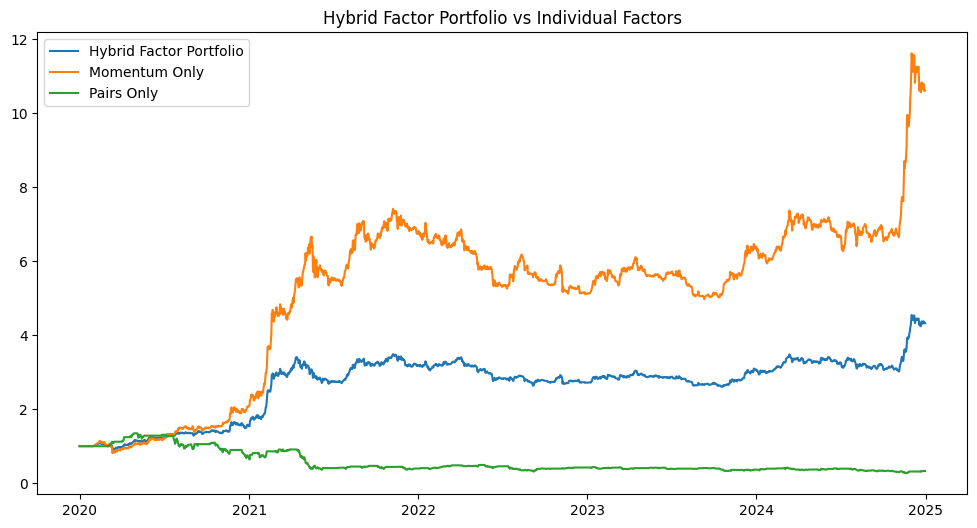

In [43]:
# Weights
w_momentum = 0.7
w_pairs = 0.3

# Combine, shift pairs signal to align
hybrid_ret = (
    w_momentum * portfolio_ret.fillna(0) +
    w_pairs * pairs_pnl.fillna(0)
)

hybrid_cum = (1 + hybrid_ret).cumprod()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hybrid_cum, label='Hybrid Factor Portfolio')
plt.plot((1 + portfolio_ret.fillna(0)).cumprod(), label='Momentum Only')
plt.plot((1 + pairs_pnl.fillna(0)).cumprod(), label='Pairs Only')
plt.legend()
plt.title('Hybrid Factor Portfolio vs Individual Factors')
plt.show()


<Axes: title={'center': '90-Day Rolling Sharpe (Hybrid Portfolio)'}>

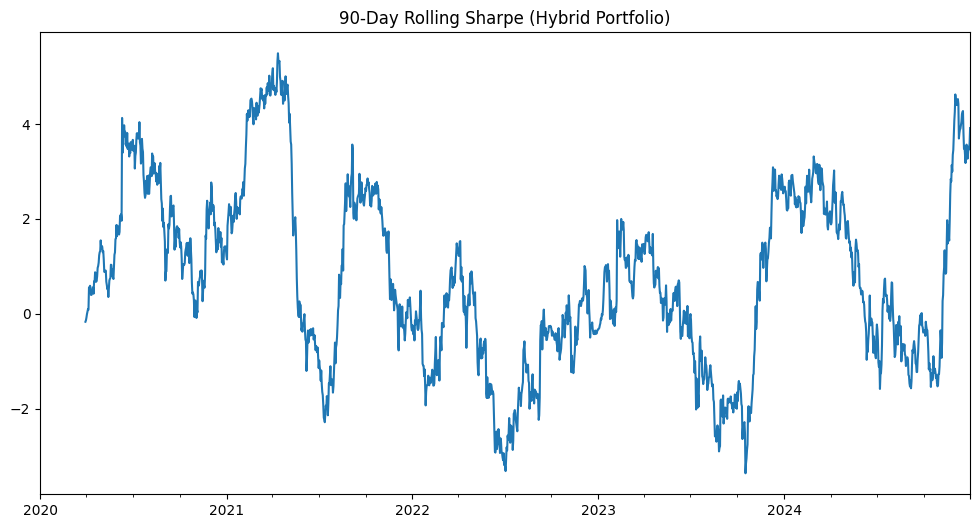

In [45]:
roll_sharpe = (
    hybrid_ret.rolling(90).mean() / hybrid_ret.rolling(90).std()
) * np.sqrt(252)

roll_sharpe.plot(figsize=(12,6), title='90-Day Rolling Sharpe (Hybrid Portfolio)')

In [46]:
print("Hybrid total return:", hybrid_cum[-1])
print("Hybrid mean daily ret:", hybrid_ret.mean())
print("Hybrid daily vol:", hybrid_ret.std())
print("Hybrid Sharpe:", (hybrid_ret.mean() / hybrid_ret.std()) * np.sqrt(252))


Hybrid total return: 4.326147648675114
Hybrid mean daily ret: 0.000877918453189941
Hybrid daily vol: 0.012359549055324453
Hybrid Sharpe: 1.1275915754553112


/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35459/3948072766.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Hybrid total return:", hybrid_cum[-1])


In [47]:
print("Momentum Sharpe:", (portfolio_ret.mean() / portfolio_ret.std()) * np.sqrt(252))
print("Pairs Sharpe:", (pairs_pnl.mean() / pairs_pnl.std()) * np.sqrt(252))
print("Hybrid Sharpe:", (hybrid_ret.mean() / hybrid_ret.std()) * np.sqrt(252))

Momentum Sharpe: 1.382598921417512
Pairs Sharpe: -0.31794486741334504
Hybrid Sharpe: 1.1275915754553112
